# Travel Insurance Prediction


## Libraries and Dataset 

In [1]:
!pip install imbalanced-learn
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from scipy.stats import mannwhitneyu


df = pd.read_csv("TravelInsurancePrediction.csv")
df.head()


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Project description

A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers. The New Insurance Package Also Includes Covid Cover. The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History. The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.<br>
Data set from Kaggle, https://www.kaggle.com/datasets/tejashvi14/travel-insurance-prediction-data .

## Project goals

Predict if the Customer Will Be Interested To Buy The Travel Insurance Package

## Data details

- Age - age of the customer.
- Employment Type - the sector in which customer is employed: Government Sector or Private Sector/Self Employed.
- GraduateOrNot- whether the customer is college graduate or not
- AnnualIncome- the yearly income of the customer in indian rupees[rounded to nearest 50 thousand rupees]
- FamilyMembers- number of members in customer's family
- ChronicDisease- whether the customer suffers from any major disease or conditions like diabetes/high bp or asthama,etc.
- FrequentFlyer- derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 years[2017-2019].
- EverTravelledAbroad- has the customer ever travelled to a foreign country[not necessarily using the company's services]
- TravelInsurance- did the customer buy travel insurance package during introductory offering held in the year 2019.


## Hypotesis

1. Null hypotesis: Family size has no impact for purchase of Travel insurance. <br>
Alternative hypotesis: Family size has impact for purchase of Travel insurance. <br>

2. Null hypotesis: ChronicDisease has no impact for purchase of Travel insurance. <br>
Alternative hypotesis: ChronicDisease has impact for purchase of Travel insurance.

## EDA

In [3]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Deleting column Unnamed: 0 whil it will not be used further.

In [4]:
df = df.drop(columns=['Unnamed: 0'])

Data types.

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


Columns: Age, AnnualIncome, FamilyMembers, ChronicDiseases and TravelInsurance - integers, Employment Type, GraduateOrNot, FrequentFlyer and EverTravelledAbroad. 

Statistical summary.

In [6]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [7]:
X = df.drop(columns=['TravelInsurance'])
y = df['TravelInsurance'] 


Ploting every feature with TravelInsurance.

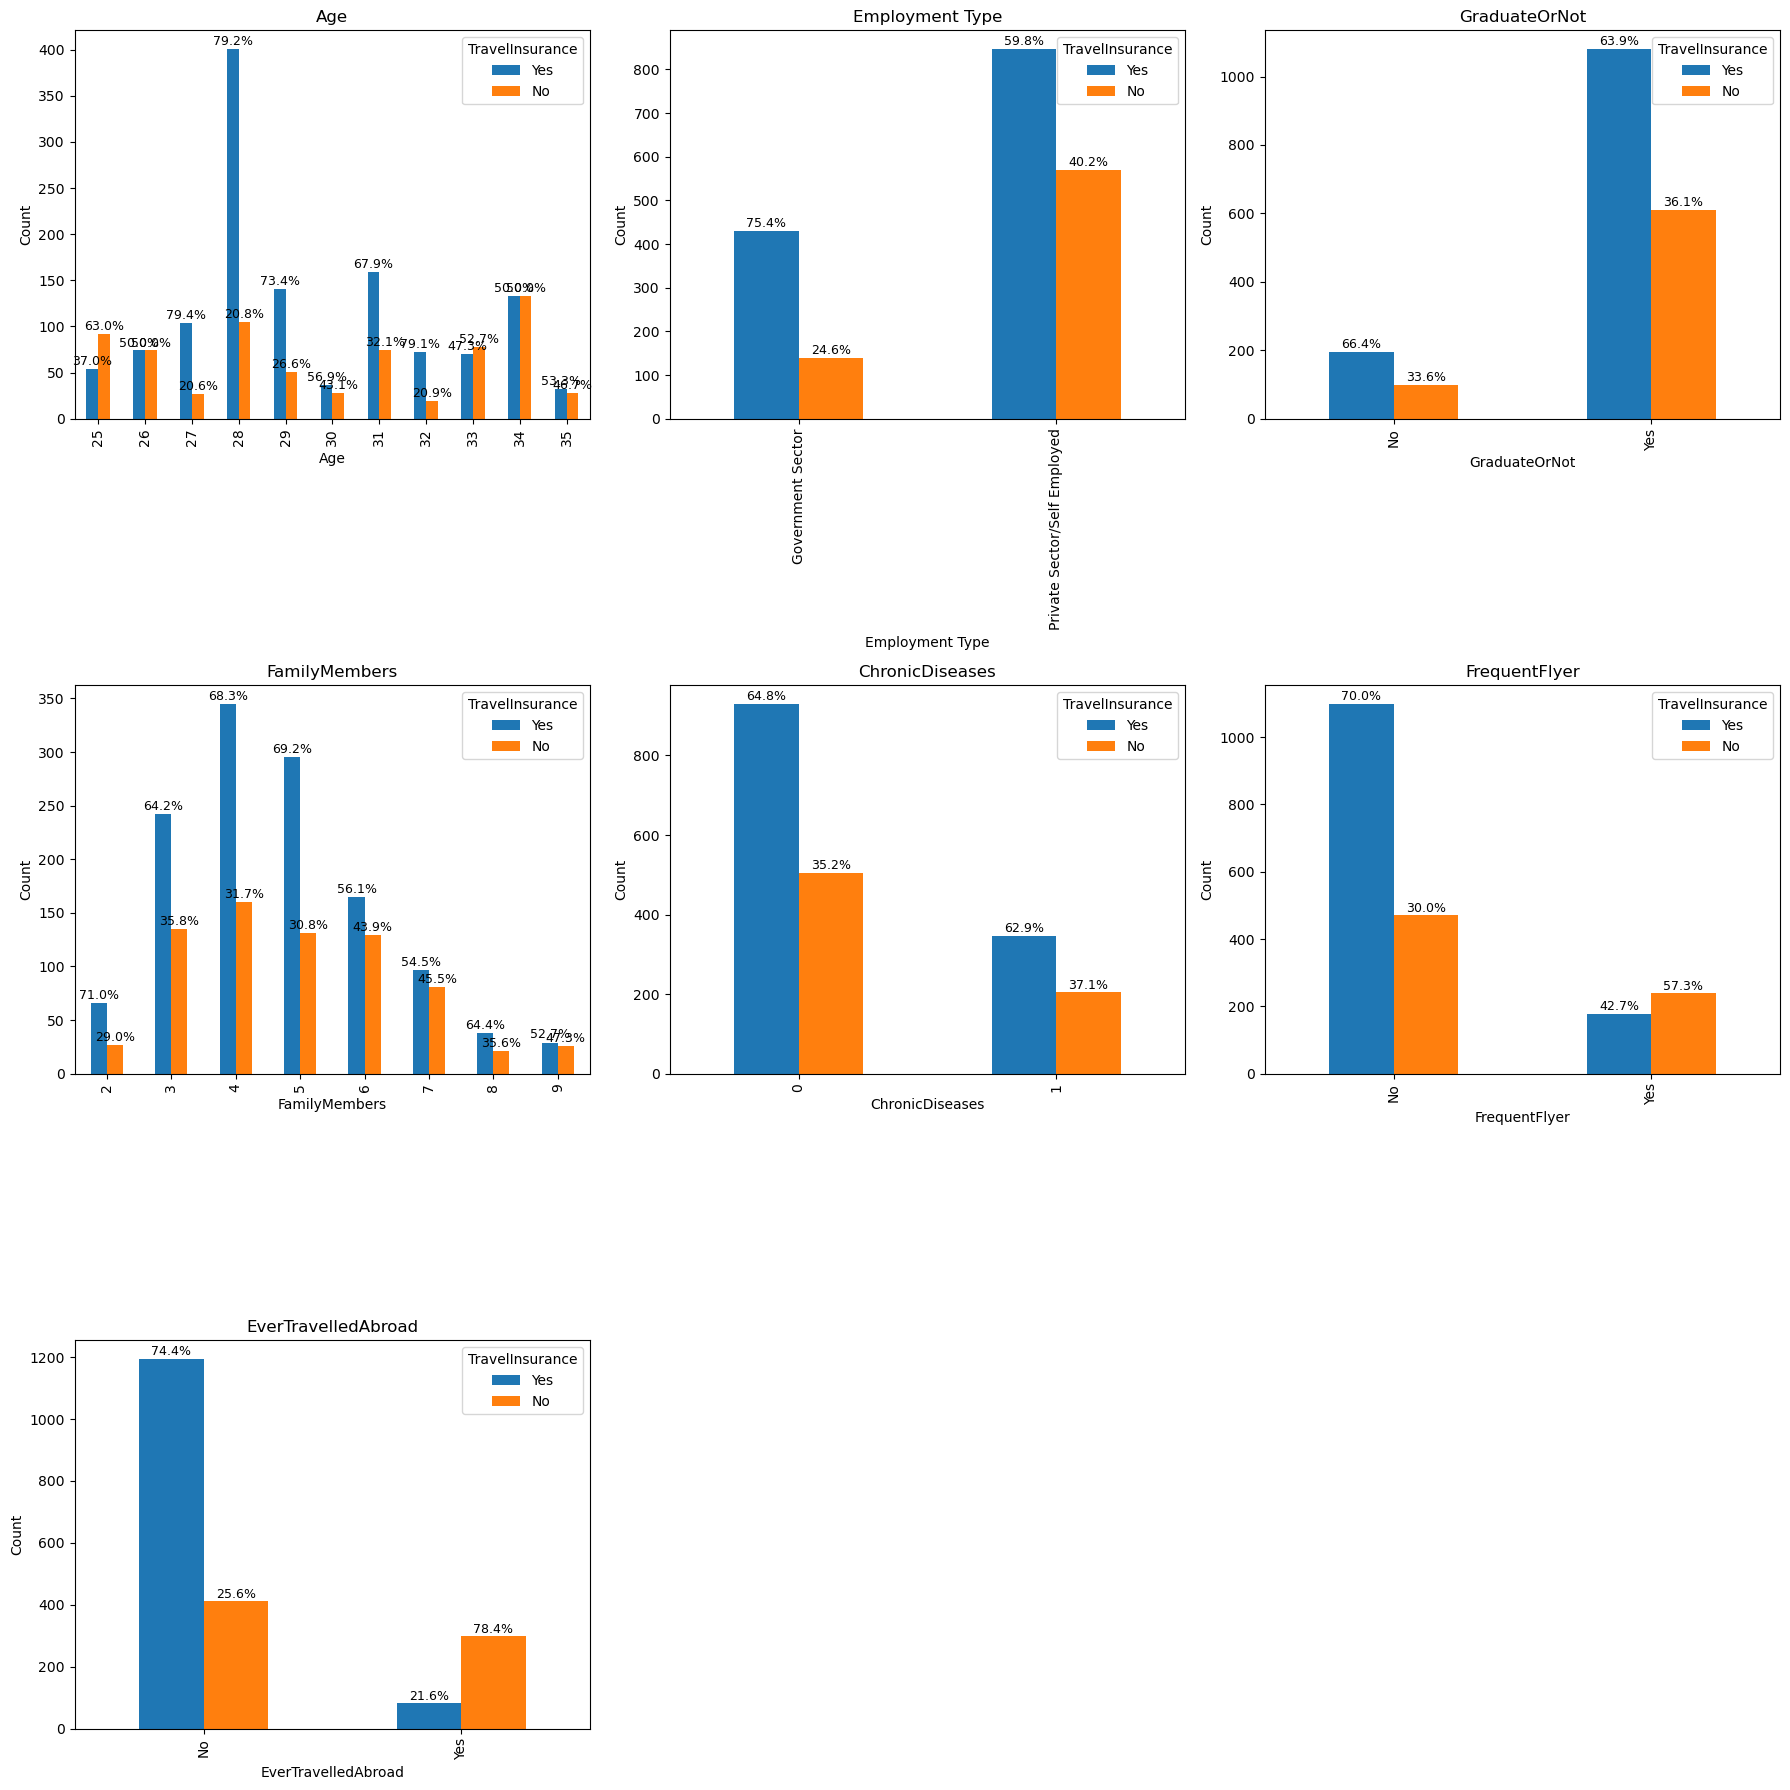

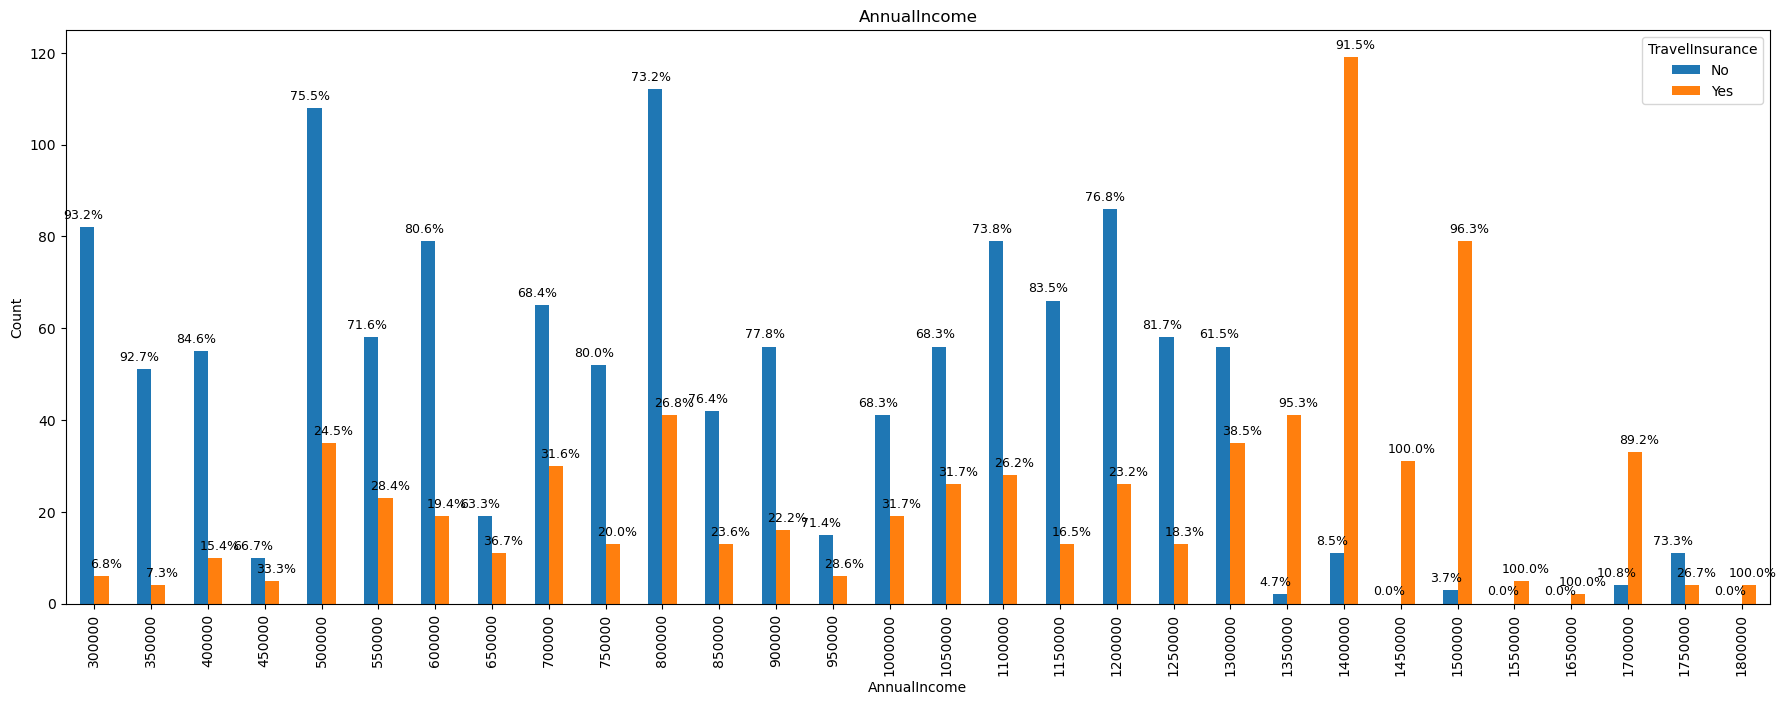

In [8]:
data = X.copy()
data['TravelInsurance'] = y

columns_to_plot = ['Age', 'Employment Type', 'GraduateOrNot',
                   'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
                   'EverTravelledAbroad']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    grouped = data.groupby([col, 'TravelInsurance']).size().unstack(fill_value=0)
    percent_df = grouped.div(grouped.sum(axis=1), axis=0) * 100

    grouped.plot(kind='bar', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='TravelInsurance', labels=['Yes', 'No'])

    for bar_container_idx, bar_container in enumerate(axes[i].containers):
        for bar_idx, bar in enumerate(bar_container):
            height = bar.get_height()
            if height > 0:
                x = bar.get_x() + bar.get_width() / 2
                percent_val = percent_df.iloc[bar_idx, bar_container_idx]
                axes[i].text(x, height + 1, f'{percent_val:.1f}%', ha='center', va='bottom', fontsize=9, rotation=0)

for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

grouped_income = data.groupby(['AnnualIncome', 'TravelInsurance']).size().unstack(fill_value=0)
percent_income = grouped_income.div(grouped_income.sum(axis=1), axis=0) * 100

ax = grouped_income.plot(kind='bar', figsize=(18, 8))

plt.title('AnnualIncome')
plt.ylabel('Count')
plt.xlabel('AnnualIncome')
plt.legend(title='TravelInsurance', labels=['No', 'Yes'])

ymax = grouped_income.values.max()

for idx, (x, row) in enumerate(grouped_income.iterrows()):
    total = row.sum()
    for j, count in enumerate(row):
        percent = percent_income.iloc[idx, j]
        xpos = idx + (-0.2 if j == 0 else 0.2)
        ax.text(
            xpos, count + ymax * 0.01, f'{percent:.1f}%', 
            ha='center', va='bottom', fontsize=9, rotation=0,
            clip_on=False
        )

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Age plot - 27 and 28 years old persons more often do not buy insurance, both close to 80%. Only group of 25 years is more often  buy insurance 63%. <br>
Employment Type - Private Sector/Self Employed is buying insurance more often buy insurance 60% than Government Sector 25%. <br>
GraduateOr Not - is similar 34% graduated and 36% not graduated.  <br>
FamilyMembers - most likely to buy - family with 2 members, most likely not to buy family with 9 members - 47%.  <br>
ChtonicDiseases - is similar 35% with chonical deseases and 37% withot chonical deseases buyes insurance.  <br>
Frequent Flyer - 57% of frequent flyer and 30% of non frequent flyer buyes insuranse. <br>
EverTravelledAbroad - 26% of ones who have not traveled abroad and 78% who traveled abroad buys insurance. <br>
AnnualIncome - people with lowest income (30000) have lowest rate of buying insurance - 7%, highest income (1800000) - highest rate of buying insurance - 100%.

Checking for duplicates

In [9]:
df.duplicated().sum()

np.int64(738)

There are 738 duplicates. These dublicates could appear because Employment Type, GraduateOrNot, ChronicDiseases, FrequentFlyer, EverTravelledAbroad and TravelInsurance has only to possible answers. Age has 11 different answers, AnnualIncome is rounded by 50000 and FamilyMembers 8 possible answers. For that reasons duplicates will accepted and not deleted.

## Data split


Data split to train, validation and test.

In [10]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)


In [11]:
X_train_df = pd.DataFrame(X_train)
y_train_series = pd.Series(y_train, name="target")
df_train = pd.concat([X_train_df, y_train_series], axis=1)
buyers = df_train[df_train["target"] == 1].drop(columns="target")
ideal_customer = buyers.mode().iloc[0]

print("Ideal customer:")
print(ideal_customer)

Ideal customer:
Age                                              34
Employment Type        Private Sector/Self Employed
GraduateOrNot                                   Yes
AnnualIncome                                1400000
FamilyMembers                                     4
ChronicDiseases                                   0
FrequentFlyer                                    No
EverTravelledAbroad                              No
Name: 0, dtype: object


## Evaluating hypotesis

In [12]:

group_no = X_train[y_train == 0]['FamilyMembers']
group_yes = X_train[y_train == 1]['FamilyMembers']


stat, p_value = mannwhitneyu(group_no, group_yes)

print("Mann-Whitney U statistics:", stat)
print("p-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis that family size has an effect on travel insurance.")
else:
    print("There is insufficient evidence to reject the null hypothesis that family size has no significant effect.")

Mann-Whitney U statistics: 151330.5
p-value: 0.03752688801410266
We reject the null hypothesis that family size has an effect on travel insurance.


In [13]:

group_no = X_train[y_train == 0]['ChronicDiseases']
group_yes = X_train[y_train == 1]['ChronicDiseases']


stat, p_value = mannwhitneyu(group_no, group_yes)

print("Mann-Whitney U statistics:", stat)
print("p-value:", p_value)


alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis that ChronicDisease has no impact for purchase of Travel insurance.")
else:
    print("There is insufficient evidence to reject the null hypothesis ChronicDisease has no impact for purchase of Travel insurance.")

Mann-Whitney U statistics: 161136.0
p-value: 0.6809240702889678
There is insufficient evidence to reject the null hypothesis ChronicDisease has no impact for purchase of Travel insurance.


## Modeling

Class creation to prepare data for modeling and prevent from data leakage.

In [14]:
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.income_bins = None

    def fit(self, X, y=None):
        _, self.income_bins = pd.qcut(
            X['AnnualIncome'], q=5, retbins=True, duplicates='drop'
        )
        return self

    def transform(self, X):
        X = X.copy()

        X['Employment Type'] = X['Employment Type'].map({
            'Government Sector': 0,
            'Private Sector/Self Employed': 1
        }).astype(int)

        X['GraduateOrNot'] = X['GraduateOrNot'].map({'Yes': 1, 'No': 0}).astype(int)
        X['FrequentFlyer'] = X['FrequentFlyer'].map({'Yes': 1, 'No': 0}).astype(int)
        X['EverTravelledAbroad'] = X['EverTravelledAbroad'].map({'Yes': 1, 'No': 0}).astype(int)

        X['IncomeGroup'] = pd.cut(
            X['AnnualIncome'],
            bins=self.income_bins,
            labels=[1, 2, 3, 4, 5],
            include_lowest=True
        ).astype(int)

        return X.drop(columns=['AnnualIncome'])

Changing answer to numbers and  change Data type. 'Employment Type' answers will be changed: from 'Government Sector' to 0 and 'Private Sector/Self Employed' to 1.
For columns: GraduateOrNot, FrequentFlyer, EverTravelledAbroad answers will be changed: from 'Yes' to 1 and from 'No' to 0. AnnualIncome answers binned to 5 bins. Divided into groups based on income values that correspond to the 20%, 40%, 60%, 80%, and 100% distribution points.

Data preprocessing 

In [15]:
preprocessor = CustomPreprocessor()
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)


The CustomPreprocessor data processing object is trained on the training data and then used to transform both the training and testing data to prepare them for modeling.

Correlation Matrix

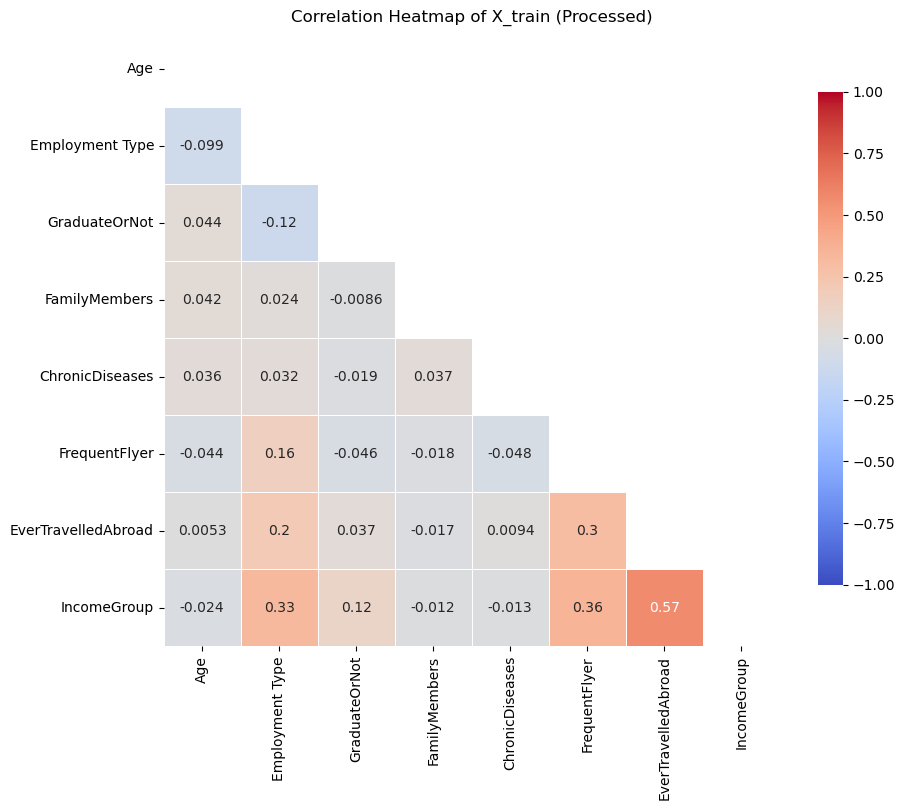

In [16]:
corr_matrix = X_train_transformed.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            mask=mask,              
            annot=True, 
            cmap="coolwarm", 
            vmin=-1, vmax=1,
            square=True,            
            linewidths=0.5, 
            cbar_kws={"shrink": .8}) 
plt.title("Correlation Heatmap of X_train (Processed)")
plt.show()

The highest correlaton between IncomeGroup and EveTravelledAbroad - 0,57 <br>
The highest negative correlaton between GraduateOrNot and EmploymentType - -0,12.

Ploting boxplot to check outliers

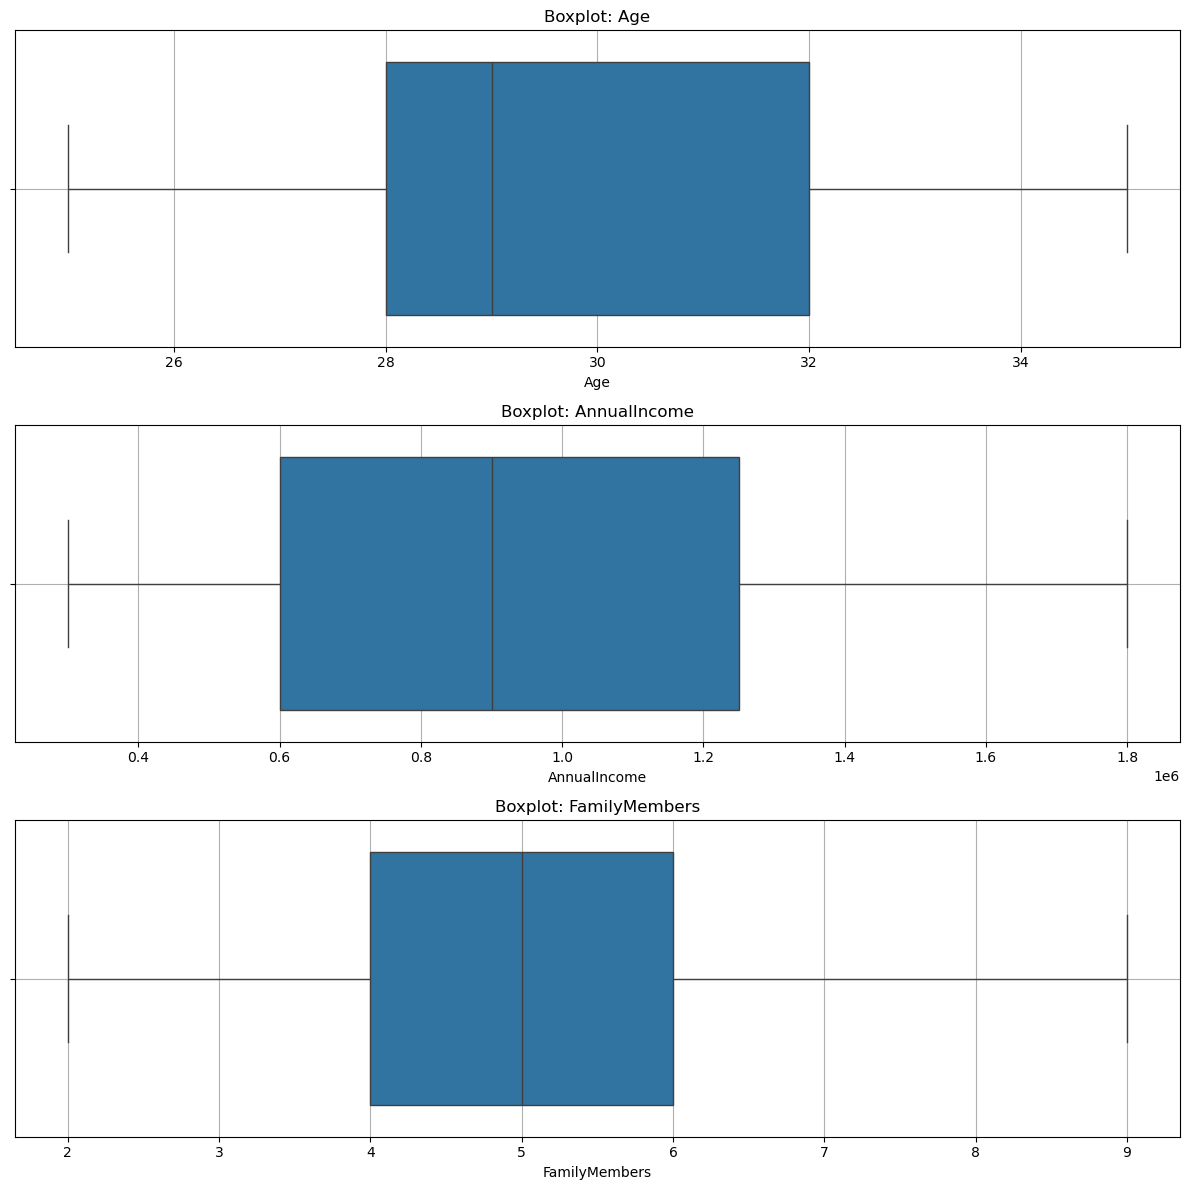

In [17]:
selected_columns = ['Age', 'AnnualIncome', 'FamilyMembers']

plt.figure(figsize=(12, len(selected_columns) * 4))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(len(selected_columns), 1, i)
    sns.boxplot(x=X_train[col], showfliers=True)
    plt.title(f'Boxplot: {col}')
    plt.grid(True)

plt.tight_layout()
plt.show()

An ImbPipeline is created in which the data is first processed with a custom CustomPreprocessor, then balanced with SMOTE to compensate for class imbalance, and finally trained with a RandomForestClassifier model.

In [18]:
pipeline = ImbPipeline([
    ('preprocessor', CustomPreprocessor()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor', CustomPreprocessor()),
                ('smote', SMOTE(random_state=42)),
                ('model', RandomForestClassifier(random_state=42))])

Train the model, evaluate its performance on validation and test sets, and visualize the confusion matrix for the test set.

VALIDATION:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       256
           1       0.65      0.65      0.65       142

    accuracy                           0.75       398
   macro avg       0.73      0.73      0.73       398
weighted avg       0.75      0.75      0.75       398

[[207  49]
 [ 49  93]]
TEST:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       256
           1       0.61      0.63      0.62       142

    accuracy                           0.72       398
   macro avg       0.70      0.70      0.70       398
weighted avg       0.72      0.72      0.72       398



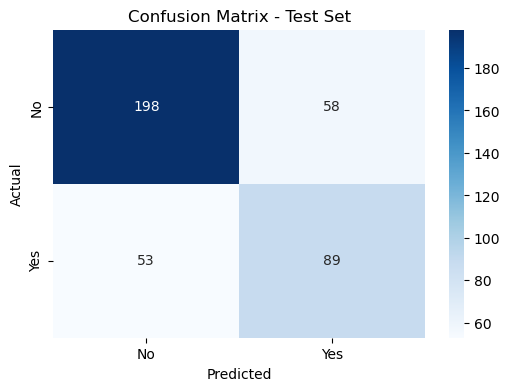

In [19]:
pipeline.fit(X_train, y_train)

y_val_pred = pipeline.predict(X_val)

print("VALIDATION:")
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))

y_test_pred = pipeline.predict(X_test)

print("TEST:")
print(classification_report(y_test, y_test_pred))
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()


The model's accuracy was 75% on the validation set and 72% on the test set, with decent precision and recall rates for both classes, but class 1 recognition was slightly worse than class 0.

Training three different models (Random Forest, Logistic Regression, XGBoost), creating a data processing and balancing (SMOTE) pipeline for each of them, then evaluating the performance of each model on the validation set, outputting a classification report and an error matrix.

In [20]:
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'XGBoost': XGBClassifier(scale_pos_weight=2.0, use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    pipeline = ImbPipeline([
        ('preprocessor', CustomPreprocessor()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)
    
    print(f"Model: {name}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    print("-" * 50)


Model: Random Forest
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       256
           1       0.65      0.65      0.65       142

    accuracy                           0.75       398
   macro avg       0.73      0.73      0.73       398
weighted avg       0.75      0.75      0.75       398

[[207  49]
 [ 49  93]]
--------------------------------------------------
Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       256
           1       0.63      0.56      0.60       142

    accuracy                           0.73       398
   macro avg       0.70      0.69      0.70       398
weighted avg       0.72      0.73      0.72       398

[[210  46]
 [ 62  80]]
--------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       256
           1       0.55   

c:\Users\Dell\anaconda3\envs\pydata-book\lib\site-packages\xgboost\training.py:199: UserWarning: [18:37:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest: best accuracy (~75%) and balanced precision and recall (~0.65 for class 1). <br>

Logistic Regression: slightly worse results (~73% accuracy), especially recall for class 1 (0.56), meaning that it misses more "positive" cases.<br>

XGBoost: lowest accuracy (~69%), with a rather low precision for class 1 (0.55), but slightly better recall (0.67), meaning that the model assigns the positive class more often, but incorrectly.

VotingClassifier model with data processing and SMOTE balancing. The accuracy of the model is evaluated on the validation data, outputting a classification report and an error matrix.

In [21]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(class_weight='balanced', random_state=42)),
        ('lr', LogisticRegression(class_weight='balanced', max_iter=1000)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1))
    ],
    voting='soft'
)

voting_pipeline = ImbPipeline([
    ('preprocessor', CustomPreprocessor()),
    ('smote', SMOTE(random_state=42)),
    ('model', voting_clf)
])

voting_pipeline.fit(X_train, y_train)

y_pred = voting_pipeline.predict(X_val)

print("VALIDATION – VotingClassifier:\n")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

c:\Users\Dell\anaconda3\envs\pydata-book\lib\site-packages\xgboost\training.py:199: UserWarning: [18:37:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VALIDATION – VotingClassifier:

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       256
           1       0.69      0.63      0.66       142

    accuracy                           0.77       398
   macro avg       0.75      0.74      0.74       398
weighted avg       0.76      0.77      0.76       398

[[215  41]
 [ 52  90]]


Accuracy 77% — slightly better than individual models. <br>

Precision and recall for class 1 are 0.69 and 0.63, respectively — which shows that the model detects positive cases better than Logistic Regression and XGBoost separately, but slightly weaker than Random Forest recall. <br>

Confusion matrix shows that errors in classifying the positive class have decreased (52 errors, previously there were 62–63).

Ploting ROC Curve

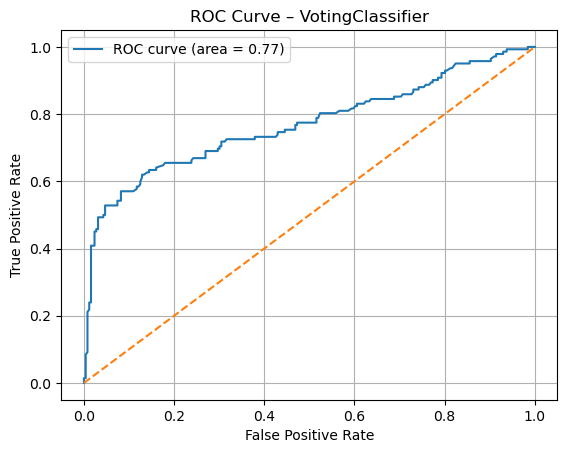

In [22]:
y_proba = voting_pipeline.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – VotingClassifier')
plt.legend()
plt.grid()
plt.show()


The model's AUC (area under the curve) is 0.77, meaning that the model is quite good and has better than random classification capability.

Changing the classification threshold from the default 0.5 to 0.3 and evaluating the model's accuracy using the selected threshold.

In [23]:
probs = voting_pipeline.predict_proba(X_val)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_val, probs)

y_pred_thresh = (probs >= 0.3).astype(int)

print(classification_report(y_val, y_pred_thresh))

              precision    recall  f1-score   support

           0       0.80      0.60      0.68       256
           1       0.50      0.73      0.60       142

    accuracy                           0.65       398
   macro avg       0.65      0.67      0.64       398
weighted avg       0.69      0.65      0.65       398



Lowering the threshold improves sensitivity for positive cases but increases false positives.

Evaluating how the model performs on the testing data using the same threshold (0.3) that was used in validation. This allows us to see if the model's sensitivity/accuracy remains similar on the new data.

In [24]:
probs_test = voting_pipeline.predict_proba(X_test)[:, 1]
y_pred_test = (probs_test >= 0.3).astype(int)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       256
           1       0.49      0.70      0.58       142

    accuracy                           0.63       398
   macro avg       0.64      0.65      0.62       398
weighted avg       0.68      0.63      0.64       398



A reduced threshold (0.3) improved the sensitivity (recall) for the positive class, but reduced the precision (precision). The goal is not to miss positive cases, this trade-off is acceptable, although the overall accuracy and precision suffer.

The model with tuned parameters

In [25]:
pipeline = ImbPipeline([
    ('preprocessor', CustomPreprocessor()),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__n_estimators': [100, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score (F1):", grid_search.best_score_)

probs_val = grid_search.best_estimator_.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_val, probs_val)

valid_indices = np.where(precision >= 0.4)[0]
best_index = valid_indices[np.argmax(recall[valid_indices])]
best_threshold = thresholds[best_index]

print(f"\n Optimal threshold by recall (precision ≥ 0.4): {best_threshold:.2f}")
print(f" Recall: {recall[best_index]:.4f}, Precision: {precision[best_index]:.4f}")

y_val_pred = (probs_val >= best_threshold).astype(int)


print("\nVALIDATION (optimizet model with the best threshold):\n")
print(classification_report(y_val, y_val_pred))
print(confusion_matrix(y_val, y_val_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best params: {'model__max_depth': 10, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best score (F1): 0.715434865174055

 Optimal threshold by recall (precision ≥ 0.4): 0.21
 Recall: 0.8310, Precision: 0.4000

VALIDATION (optimizet model with the best threshold):

              precision    recall  f1-score   support

           0       0.77      0.31      0.44       256
           1       0.40      0.83      0.54       142

    accuracy                           0.49       398
   macro avg       0.58      0.57      0.49       398
weighted avg       0.64      0.49      0.48       398

[[ 79 177]
 [ 24 118]]


Lowering the threshold to 0.21 allows us to catch 83% of positive cases, but: <br>
Many negative cases are falsely classified as positive - as many as 177 out of 256. <br>
This leads to a very low recall for class 0 (only 31%) and significantly reduces the overall accuracy: 49%. This is accebletable because the most mimport part is to catch possitive cases.

Testing model with TEST data

In [26]:
probs_test = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

y_test_pred = (probs_test >= best_threshold).astype(int)

print("\nTEST (model with optimal threshold from validation):\n")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))



TEST (model with optimal threshold from validation):

              precision    recall  f1-score   support

           0       0.77      0.27      0.40       256
           1       0.39      0.85      0.54       142

    accuracy                           0.48       398
   macro avg       0.58      0.56      0.47       398
weighted avg       0.64      0.48      0.45       398

[[ 70 186]
 [ 21 121]]


Class 1 (positive): High recall (0.85) remains — most positive cases are detected, but precision remains low (0.39) — almost 6 out of 10 positive predictions are false.<br>
Class 0 (negative): Only 27% of true negatives are classified correctly. Many false positives — too sensitive threshold.<br>
Overall accuracy: 48%, but this is not the most important criterion when trying to catch as many positive cases as possible. <br>



## Evaluation

The model correctly predicts 85% of positive cases, which is the most important aspect. It is better to offer travel insurance to someone who is not interested, than to miss offering it to someone who is willing to buy — and risk losing a customer.

## Sugestions for future
- Include more/other parameters to the model.
- To test other models.
